In [1]:
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
sol_df = pd.read_csv('./data/with_features.csv')

Split the data into training and test sets (80% for training and 20% for testing)

In [3]:
train, test = train_test_split(sol_df,random_state=42,shuffle=True, test_size=0.2)

In [4]:
train.columns[:4]

Index(['Name', 'SMILES', 'LogS', 'mol'], dtype='object')

In [5]:
train.columns[4:]

Index(['exactmw', 'amw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds',
       'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms',
       'NumAmideBonds', 'FractionCSP3', 'NumRings', 'NumAromaticRings',
       'NumAliphaticRings', 'NumSaturatedRings', 'NumHeterocycles',
       'NumAromaticHeterocycles', 'NumSaturatedHeterocycles',
       'NumAliphaticHeterocycles', 'NumSpiroAtoms', 'NumBridgeheadAtoms',
       'labuteASA', 'tpsa', 'CrippenClogP', 'CrippenMR', 'chi0v', 'chi1v',
       'chi2v', 'chi3v', 'chi4v', 'chi0n', 'chi1n', 'chi2n', 'chi3n', 'chi4n',
       'hallKierAlpha', 'kappa1', 'kappa2', 'kappa3', 'Phi'],
      dtype='object')

In [6]:
train_X = train[train.columns[4:]]
train_y = train['LogS']

In [7]:
train_X

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
252,284.104859,284.311,4.0,0.0,5.0,0.0,4.0,21.0,37.0,4.0,...,11.690953,6.647840,2.776341,2.776341,1.709633,-2.620000,14.782147,7.239263,4.454376,5.095802
696,308.104859,308.333,4.0,1.0,4.0,1.0,4.0,23.0,39.0,4.0,...,12.652568,7.367289,3.861854,3.861854,2.814558,-2.880000,15.032579,6.084897,2.878886,3.977030
473,216.060656,216.312,2.0,2.0,2.0,2.0,2.0,15.0,27.0,3.0,...,8.167930,4.768581,2.352651,2.352651,1.507781,-1.423117,10.106872,3.981045,1.991959,2.682395
3080,130.062994,130.143,3.0,1.0,3.0,1.0,3.0,9.0,19.0,3.0,...,5.385031,2.616705,0.672905,0.672905,0.261541,-0.830000,8.170000,4.089266,3.727880,3.712145
5628,156.089878,156.185,4.0,2.0,0.0,2.0,4.0,11.0,23.0,4.0,...,6.487525,3.725041,2.041618,2.041618,1.382411,-1.060000,8.040604,3.365968,1.500478,2.460401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,283.133907,283.799,3.0,0.0,6.0,0.0,2.0,19.0,41.0,4.0,...,12.072396,6.472696,2.796352,2.796352,1.944493,-1.060000,15.995741,7.510031,4.514582,6.322554
5191,294.078661,294.336,7.0,3.0,4.0,2.0,6.0,20.0,34.0,8.0,...,10.991522,5.685774,2.452918,2.452918,1.540724,-2.350000,14.067454,5.333996,3.150817,3.751787
5390,128.058577,128.131,4.0,2.0,0.0,2.0,4.0,9.0,17.0,4.0,...,4.910175,2.804320,1.401695,1.401695,0.927291,-1.060000,6.065945,2.478333,1.011451,1.670381
860,408.008593,408.413,9.0,3.0,4.0,3.0,7.0,27.0,39.0,11.0,...,13.381710,7.280968,3.639442,3.639442,2.338042,-2.860000,18.917024,6.701778,4.113435,4.695470


In [8]:
train_y

252    -4.567303
696    -3.062509
473    -2.733021
3080   -0.960256
5628   -1.591600
          ...   
5734   -3.682200
5191   -2.543000
5390   -1.993700
860    -1.376747
7270   -4.130000
Name: LogS, Length: 7913, dtype: float64

In [9]:
test_X = test[test.columns[4:]]
test_y = test['LogS']

In [10]:
test_X.shape

(1979, 41)

In [11]:
test_y.shape

(1979,)

Just to compare the distribution of the training and test LogS values. Since we split it randomly, we see that both distributions are somewhat similar. 

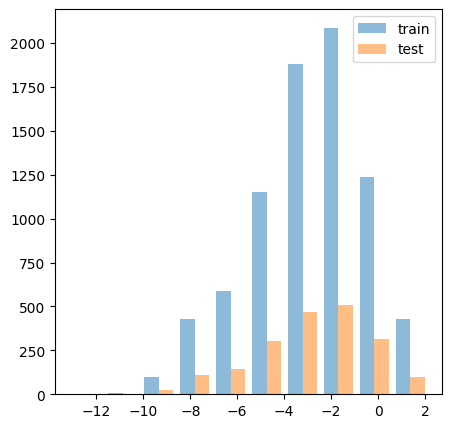

In [12]:
f = plt.figure(figsize=(5,5))
plt.hist([train_y,test_y], bins=10, alpha=0.5, label=['train','test'])
plt.legend()

StandardScaler basically divides each row by its mean to normalize the data. Different columns have have different ranges and normalizing the data ensures that columns with large values do not dominate. It also reduces computational overhead and also helps the model to converge faster.

In [13]:
from sklearn.preprocessing import StandardScaler

scale_x = StandardScaler()
scale_y = StandardScaler()

train_X = scale_x.fit_transform(train_X)
test_X = scale_x.transform(test_X)

the scale_x and scale_y objects are used to normalize features or x and the target y, they are then used fit to the training data and simply used to transform the test data. This is done to maintain the 'unseen nature' of the test set.

In [14]:
train_X

array([[ 0.230936  ,  0.22914806,  0.04226449, ...,  0.31100776,
        -0.04856108,  0.1085883 ],
       [ 0.39107257,  0.38913044,  0.04226449, ...,  0.0830988 ,
        -0.0537098 , -0.12703618],
       [-0.22307921, -0.22371356, -0.53987461, ..., -0.33226903,
        -0.05660829, -0.39969926],
       ...,
       [-0.8102605 , -0.81098383,  0.04226449, ..., -0.62895286,
        -0.0598126 , -0.61283939],
       [ 1.05766595,  1.055646  ,  1.49761223, ...,  0.20489094,
        -0.04967528,  0.02427438],
       [-0.47665672, -0.47713333, -0.53987461, ..., -0.32857666,
        -0.05607511, -0.33899621]])

In [15]:
test_X

array([[ 1.1377989 ,  1.13834108,  1.20654268, ...,  0.30156793,
        -0.05110354,  0.1033298 ],
       [ 0.12452995,  0.12291715, -0.24880506, ...,  0.02304222,
        -0.05133857, -0.10472665],
       [-1.01103972, -1.01112497,  0.04226449, ..., -0.93560674,
         2.55380472, -0.77486436],
       ...,
       [ 0.05032153,  0.04903968,  0.62440359, ..., -0.11792549,
        -0.04896153, -0.1275635 ],
       [-0.5967861 , -0.59759629, -0.53987461, ..., -0.64217335,
        -0.05993202, -0.66937607],
       [-0.6096087 , -0.61045642, -0.53987461, ...,  0.3774109 ,
        -0.03904627,  0.55398379]])

In [16]:
train_y = scale_y.fit_transform(train_y.values.reshape(-1,1))

In [17]:
train_y

array([[-0.70695506],
       [-0.07405467],
       [ 0.06452452],
       ...,
       [ 0.37547489],
       [ 0.63495878],
       [-0.52303011]])

In our case we already had the test set. In certain situations, the model needs to be trained on new data which is truly unseen. Hence it is essential to save the scaler variables as well.

In [18]:
from joblib import dump

dump(scale_x,'./models/scale_x.pkl')
dump(scale_y,'./models/scale_y.pkl')

['./models/scale_y.pkl']

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

Initializing our Multi-Layer-Perceptron (neural network) with some 'hyperparameters'

In [20]:
mlp = MLPRegressor(hidden_layer_sizes=[64, 128], activation='relu', solver='adam', alpha=0.1, 
                   batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01, 
                   max_iter=100, random_state=42, n_iter_no_change=10)

fitting the model to our training data.

In [21]:
mlp.fit(train_X, train_y.reshape(-1,1))

/opt/homebrew/anaconda3/envs/che596/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(alpha=0.1, hidden_layer_sizes=[64, 128], learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=100, random_state=42)

predicting the LogS values of our test data

In [22]:
predicted_y = mlp.predict(test_X)
predicted_y= scale_y.inverse_transform(predicted_y.reshape(-1,1))

[Text(0, 0.5, 'Predicted LogS')]

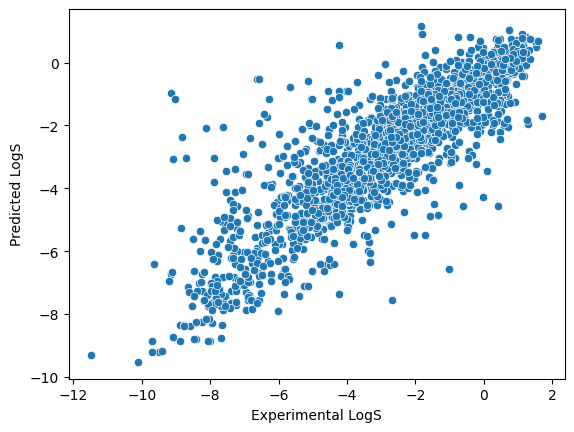

In [23]:
ax = sns.scatterplot(x=test_y,y=predicted_y.flatten())
ax.set(xlabel="Experimental LogS")
ax.set(ylabel="Predicted LogS")

always use multiple error metrics

In [24]:
og_r2 = r2_score(test_y,predicted_y)
print(og_r2)

0.7300666923416147


In [25]:
og_mae = mean_absolute_error(test_y,predicted_y)
print(og_mae)

0.8473057156580447


In [26]:
og_rmse = root_mean_squared_error(test_y,predicted_y) #root mean squared error 
print(og_rmse)

1.2198619320960034


Cross Validation and Model Selection

We may need to select optimal hyperparameters to improve our model's performance - Hyperparameter tuning. We might also need to test multiple algorithms, like MLP vs DecisionTrees, etc. In order to truly let our test set be unseen, we need to further divide our model into train and validation sets. For each set of hyperparameters, or for each algorithm, we then evaluate our model on the validation set and compare. Then we use the best model to predict our test set.

In [27]:
import warnings
warnings.filterwarnings("ignore")
# Here I am trying Grid Search where I have to provide the exact values of hyperparameters that I want to try
# 3 values for regularization, and 2 values of the optimier or solver, 
# the total number of times the model will be intialized and run will be 6
# This is a simple example, in real life you can try more values of the hyperparameters

parameters = {'alpha':[0.1, 0.01, 0.001], 'solver':['adam','sgd']}
grid = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1)
grid.fit(train_X, train_y.reshape(-1,1))


/opt/homebrew/anaconda3/envs/che596/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/che596/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/che596/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/che596/lib/python3.12/site-packages/sklearn/

GridSearchCV(cv=5,
             estimator=MLPRegressor(alpha=0.1, hidden_layer_sizes=[64, 128],
                                    learning_rate='adaptive',
                                    learning_rate_init=0.01, max_iter=100,
                                    random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001],
                         'solver': ['adam', 'sgd']})

Results of Grid Search with Cross Validation. The splits indicate that the algorithm did 5-Fold Cross Validation. 

In [28]:
for i in grid.cv_results_.keys():
    print(i,grid.cv_results_[i])

mean_fit_time [3.63559546 6.504316   5.24445281 6.69122415 6.32632699 5.73893023]
std_fit_time [0.70870316 0.14169946 0.77630448 0.11656492 0.36757011 0.58129924]
mean_score_time [0.00483041 0.00798521 0.00681396 0.00892935 0.00969882 0.00415177]
std_score_time [0.00059793 0.00461418 0.00264233 0.00294013 0.00749969 0.00094768]
param_alpha [0.1 0.1 0.01 0.01 0.001 0.001]
param_solver ['adam' 'sgd' 'adam' 'sgd' 'adam' 'sgd']
params [{'alpha': 0.1, 'solver': 'adam'}, {'alpha': 0.1, 'solver': 'sgd'}, {'alpha': 0.01, 'solver': 'adam'}, {'alpha': 0.01, 'solver': 'sgd'}, {'alpha': 0.001, 'solver': 'adam'}, {'alpha': 0.001, 'solver': 'sgd'}]
split0_test_score [0.73327567 0.7431295  0.74175774 0.73931927 0.75634352 0.74350682]
split1_test_score [0.72163157 0.71460151 0.73468436 0.71603145 0.69896043 0.71134788]
split2_test_score [0.73165958 0.73611368 0.71779853 0.73255172 0.71289802 0.73500112]
split3_test_score [0.72574009 0.73661704 0.72562965 0.73614208 0.73679119 0.737915  ]
split4_test_s

The best model from grid search

In [29]:
grid.best_estimator_

MLPRegressor(alpha=0.1, hidden_layer_sizes=[64, 128], learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=100, random_state=42,
             solver='sgd')

Using that to predict the solubility of our test data

In [30]:
cv_pred_y=grid.best_estimator_.predict(test_X)

In [31]:
cv_pred_y = scale_y.inverse_transform(cv_pred_y.reshape(-1,1))

[Text(0, 0.5, 'Predicted LogS')]

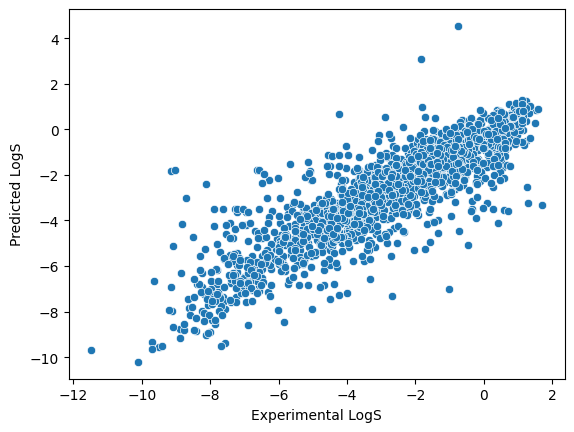

In [32]:
ax = sns.scatterplot(x=test_y,y=cv_pred_y.flatten())
ax.set(xlabel="Experimental LogS")
ax.set(ylabel="Predicted LogS")

In [33]:
new_r2 = r2_score(test_y,cv_pred_y)
print(f'Old R2: {og_r2} \n New R2: {new_r2}')

Old R2: 0.7300666923416147 
 New R2: 0.7506247049186345


In [34]:
new_mae = mean_absolute_error(test_y,cv_pred_y)
print(f'Old MAE: {og_mae} \n New MAE: {new_mae}')

Old MAE: 0.8473057156580447 
 New MAE: 0.8074002775112946


In [35]:
new_rmse = root_mean_squared_error(test_y,cv_pred_y) #root mean squared error 
print(f'Old RMSE: {og_rmse} \n New RMSE: {new_rmse}')

Old RMSE: 1.2198619320960034 
 New RMSE: 1.1724900175487034


In [36]:
train.to_csv('./data/train.csv',index=False)
test.to_csv('./data/test.csv',index=False)

Save Model

In [37]:
from joblib import dump
dump(grid.best_estimator_, './models/model.joblib')

['./models/model.joblib']